# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [31]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


In [73]:
def makeHistogram(toPlot, title, x, y = "Revenue", top_n=10, minY=None, maxY=None):

    # Convert numpy arrays to pandas Series
    if isinstance(toPlot, np.ndarray):
        toPlot = pd.Series(toPlot)
    
    # Select top n if requested
    if top_n is not None:
        try:
            toPlot = toPlot.nlargest(top_n)
        except Exception:
            toPlot = toPlot[:top_n]
    
    # Plot the data
    ax = toPlot.plot(kind="bar", figsize=(10, 6), title=title)
    plt.xlabel(x)
    plt.ylabel(y)
    
    # Set y-axis limits if provided
    if minY is not None or maxY is not None:
        plt.ylim(bottom=minY, top=maxY)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def makePieChart(toPie, title="Pie Chart"):

    # Create the pie chart
    toPie.plot(
        kind="pie",
        figsize=(8, 8),
        autopct="%1.1f%%",  
        startangle=90,      
        legend=False
    )
    
    plt.title(title)
    plt.ylabel("")  # Remove default y-label
    plt.tight_layout()
    plt.show()
    


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


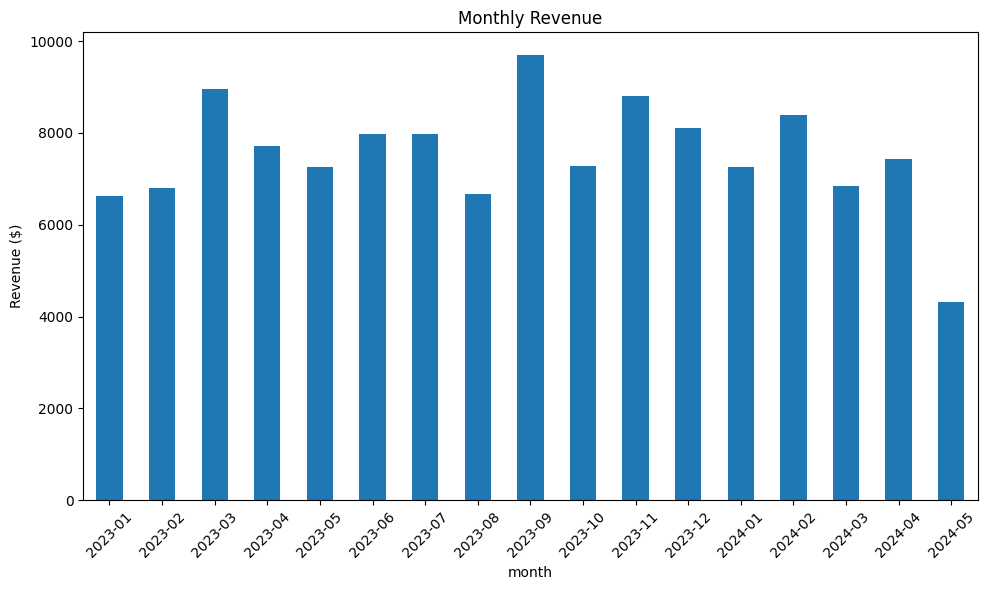

In [33]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

period[M]
   order_id  customer_id customer_segment region order_date product_category  \
0         1           52          Student  North 2023-01-01         Clothing   
1         2           93          Student   West 2023-01-02           Sports   
2         3           15     Professional   East 2023-01-03           Sports   
3         4           72          Student   East 2023-01-04           Sports   
4         5           61          Student   West 2023-01-05            Books   

   quantity  unit_price  revenue  discount_applied payment_method    month  \
0         1       42.43    42.43                 0     Debit Card  2023-01   
1         1       24.18    24.18                 0      Gift Card  2023-01   
2         3      158.71   476.13                 0     Debit Card  2023-01   
3         1       60.42    60.42                 0    Credit Card  2023-01   
4         3       43.78   131.34                 0      Gift Card  2023-01   

  day_of_week  
0      Sunday  
1      M

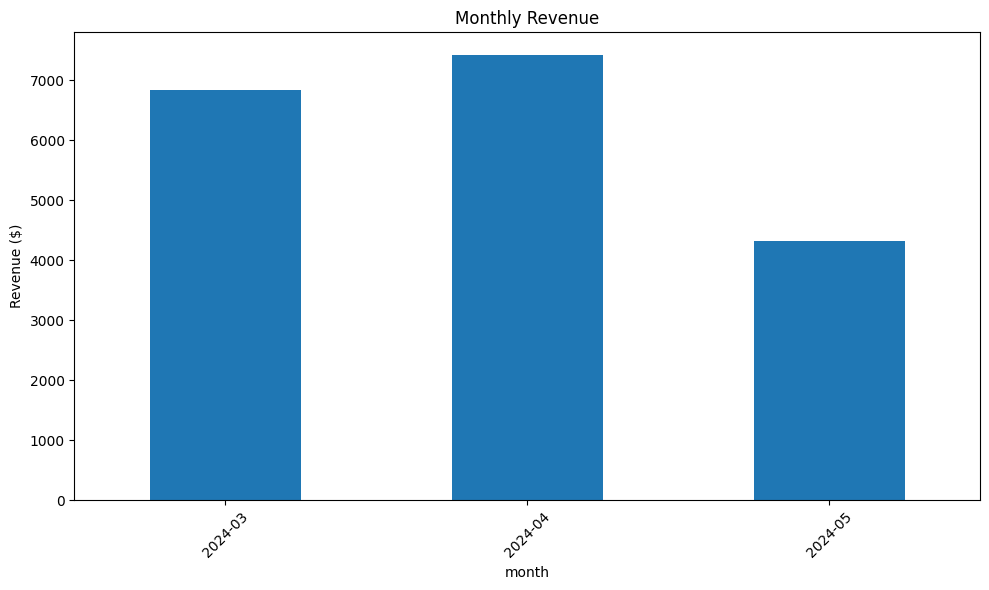

The total revenue last quarter was 18580.73


In [34]:
# Your code here
#2024-03 - #2024-05
print(data["month"].dtype)
print(data.head())
last_quarter = data[data["month"].astype(str).isin(["2024-03", "2024-04", "2024-05"])]
last_quarter.head()


monthly_revenue = last_quarter.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

#Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#conclusion
total = last_quarter["revenue"].sum().round(2)
total = str(total)

print("The total revenue last quarter was " +  total)



### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

customer_id
62    1515.83
48    1198.26
90    1134.25
33    1069.20
24    1064.02
Name: unit_price, dtype: float64


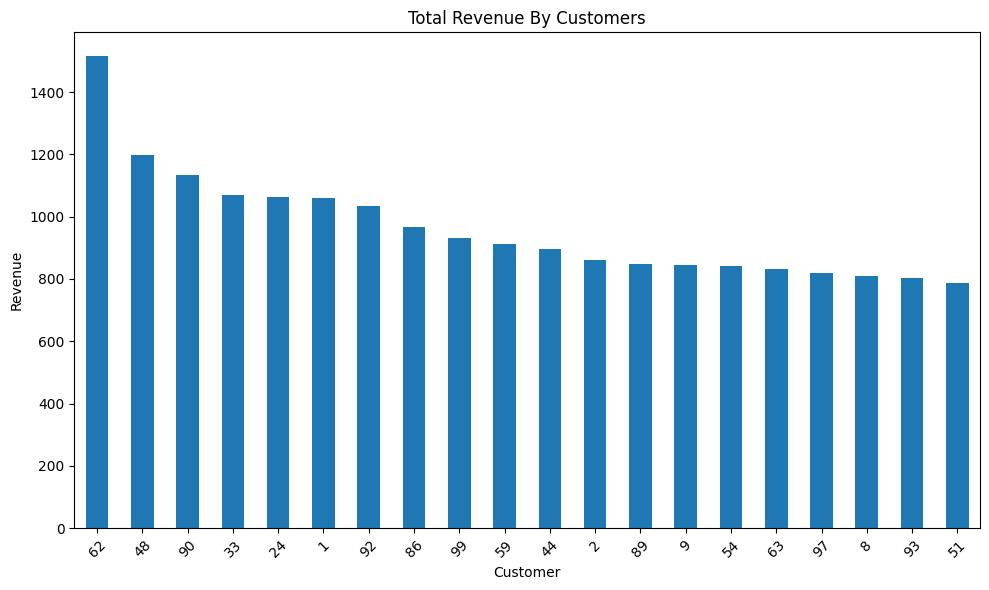

In [42]:
#groupby customer_id_unit_price.sum()
customer_totals = data.groupby("customer_id")["unit_price"].sum() #could have done agg sum,mean if other figures needed
customer_totals = customer_totals.sort_values(ascending=False)
print(customer_totals.head())

makeHistogram(customer_totals, "Total Revenue By Customers", "Customer", "Revenue", 20)

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

customer_segment
Student         21565.64
Professional    19311.62
Senior          10882.41
Name: unit_price, dtype: float64


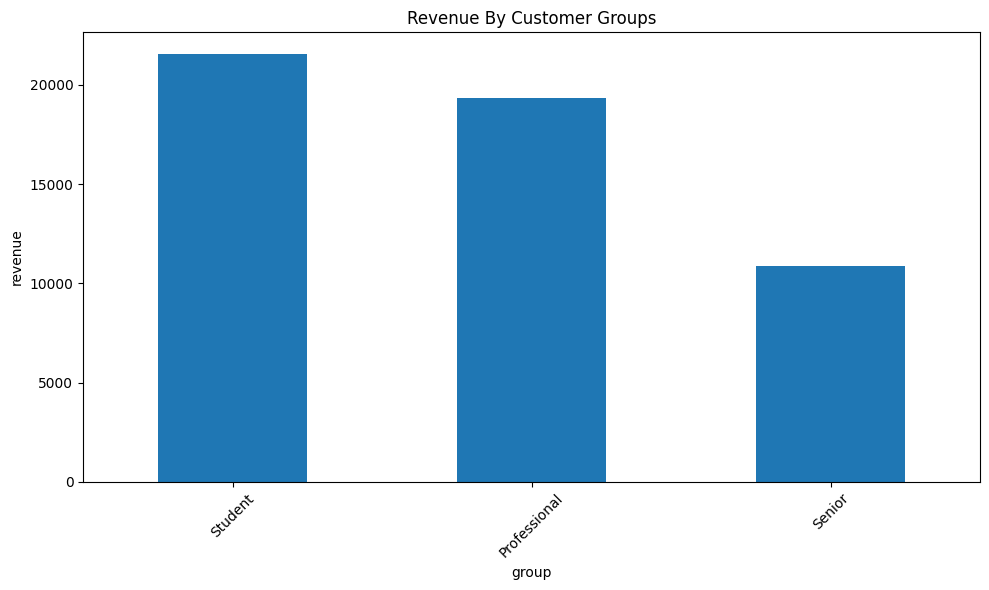

In [44]:
group_totals = data.groupby('customer_segment')['unit_price'].sum()
group_totals = group_totals.sort_values(ascending=False)
print(group_totals.head())
makeHistogram(group_totals, "Revenue By Customer Groups", "group", "revenue")

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

             sum        mean      meanx80
region                                   
North   14350.74  107.900301  8632.024060
South   14011.60  110.327559  8826.204724
East    12429.21   95.609308  7648.744615
West    10968.12   99.710182  7976.814545


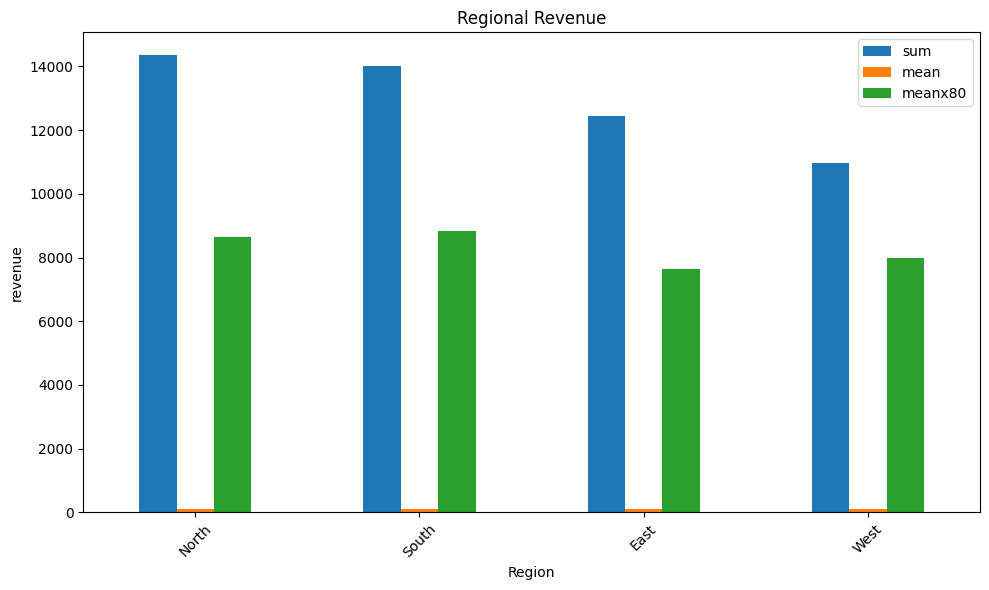

In [54]:
# Your code here
region_totals = data.groupby("region")["unit_price"].agg(['sum', 'mean'])
region_totals = region_totals.sort_values(by = "sum", ascending=False)
region_totals["meanx80"] = region_totals["mean"] * 80
print(region_totals.head())

makeHistogram(region_totals, "Regional Revenue", "Region")

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

product_category
Books           9552.43
Sports         10145.43
Clothing       10308.56
Electronics    10691.65
Home           11061.60
Name: unit_price, dtype: float64


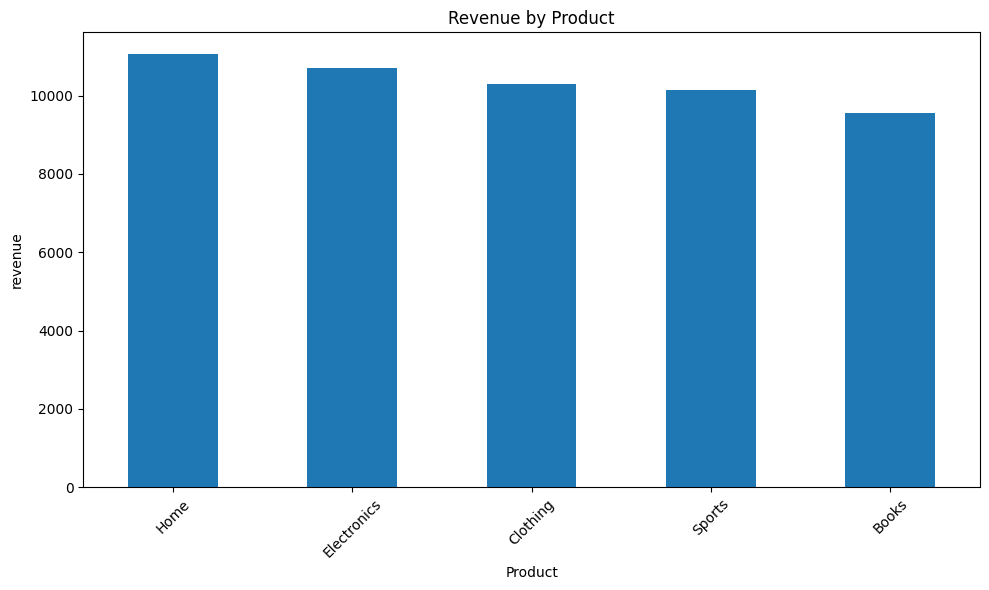

In [51]:
# Your code here
product_category = data.groupby("product_category")["unit_price"].sum()
product_category = product_category.sort_values(ascending = True)
print(product_category.head())

makeHistogram(product_category, "Revenue by Product", "Product")

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

                       sum        mean       meanx80
discount_applied                                    
20                 3078.12   99.294194   9929.419355
0                 24631.63  101.364733  10136.473251
10                 4469.86  101.587727  10158.772727
30                 4484.56  101.921818  10192.181818
5                  6065.78  102.809831  10280.983051


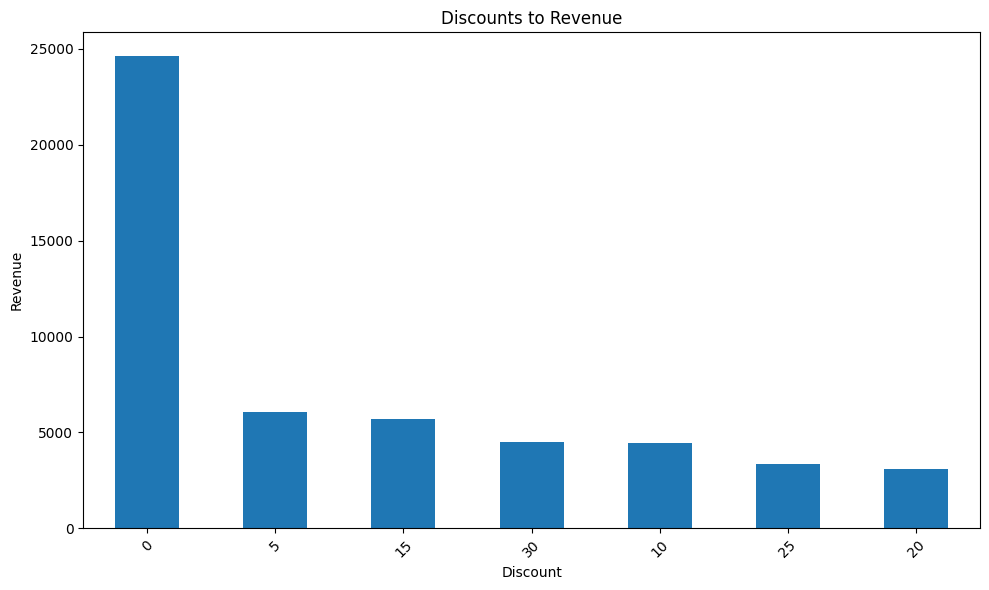

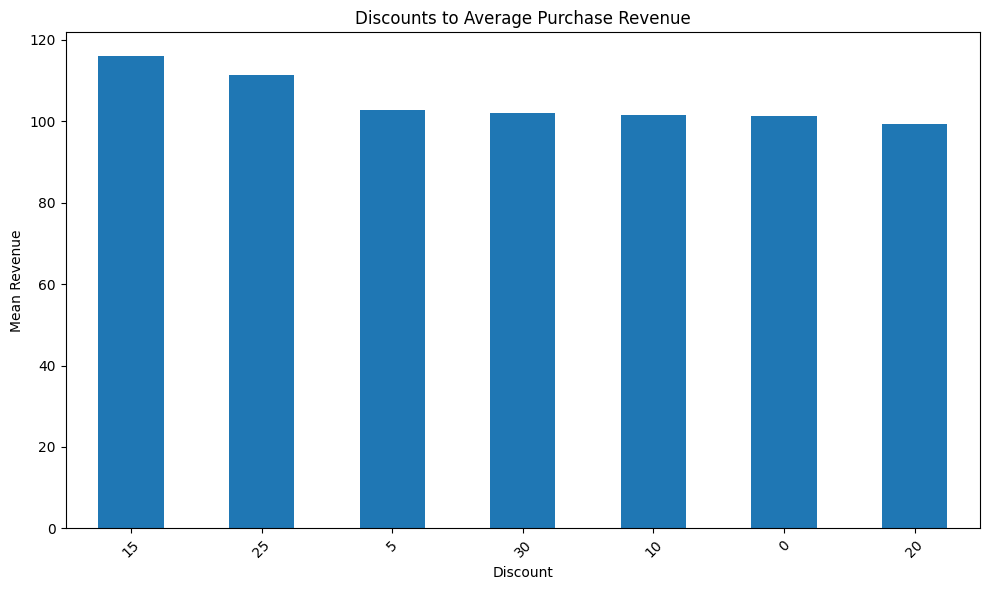

Percentage of revenue from non-discount purchases: 47.59%
Percentage of revenue from discount purchases: 52.41%
Total revenue percentage (all purchases): 100.00%
Total revenue from discount purchases: 27128.04


In [85]:
# Your code here
discount_category = data.groupby("discount_applied")["unit_price"].agg(['sum', 'mean'])
discount_category = discount_category.sort_values(by = "mean", ascending = True)
discount_category["meanx80"] = discount_category['mean'] * 100
print(discount_category.head())

makeHistogram(discount_category["sum"], "Discounts to Revenue", "Discount")
makeHistogram(discount_category["mean"], "Discounts to Average Purchase Revenue", "Discount", "Mean Revenue")

non_discount_total = discount_category.loc[0, "sum"] if 0 in discount_category.index else 0
discount_total = discount_category.loc[discount_category.index != 0, "sum"].sum()
total_revenue = non_discount_total + discount_total

non_discount_percent = (non_discount_total / total_revenue) * 100
discount_percent = (discount_total / total_revenue) * 100

print(f"Percentage of revenue from non-discount purchases: {non_discount_percent:.2f}%")
print(f"Percentage of revenue from discount purchases: {discount_percent:.2f}%")
print(f"Total revenue percentage (all purchases): {non_discount_percent + discount_percent:.2f}%")

discount_total = discount_category.loc[discount_category.index != 0, "sum"].sum()

print("Total revenue from discount purchases:", discount_total)


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

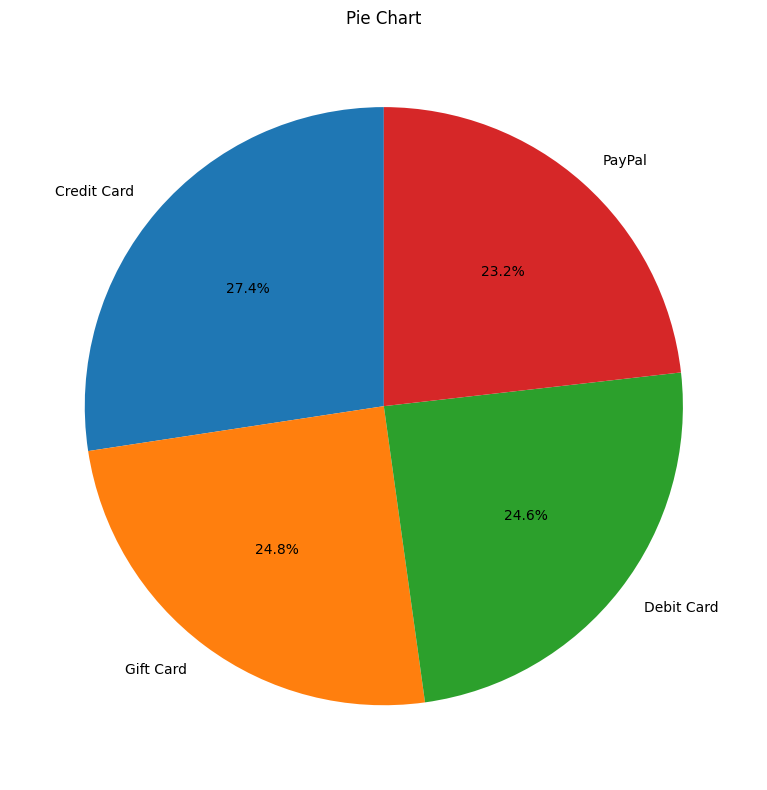

payment_method
PayPal         27384.24
Gift Card      31540.95
Debit Card     33945.62
Credit Card    35269.86
Name: revenue, dtype: float64


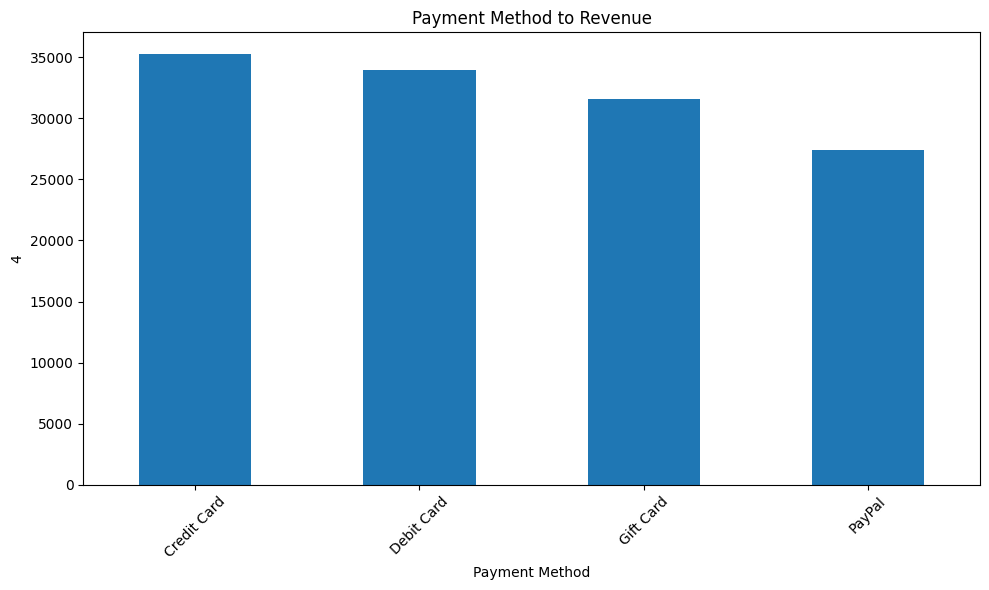

In [64]:
#Pie Chart for percentages
methods = data['payment_method'].value_counts()
makePieChart(methods)


#bar chart for payment method & money spent
payment_category = data.groupby("payment_method")['revenue'].sum()
payment_category = payment_category.sort_values(ascending = True)
print(payment_category.head())
makeHistogram(payment_category, "Payment Method to Revenue", "Payment Method", 4)

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

days
Tuesday      18968.41
Wednesday    18908.21
Saturday     18660.35
Friday       18522.40
Thursday     17846.36
Name: revenue, dtype: float64


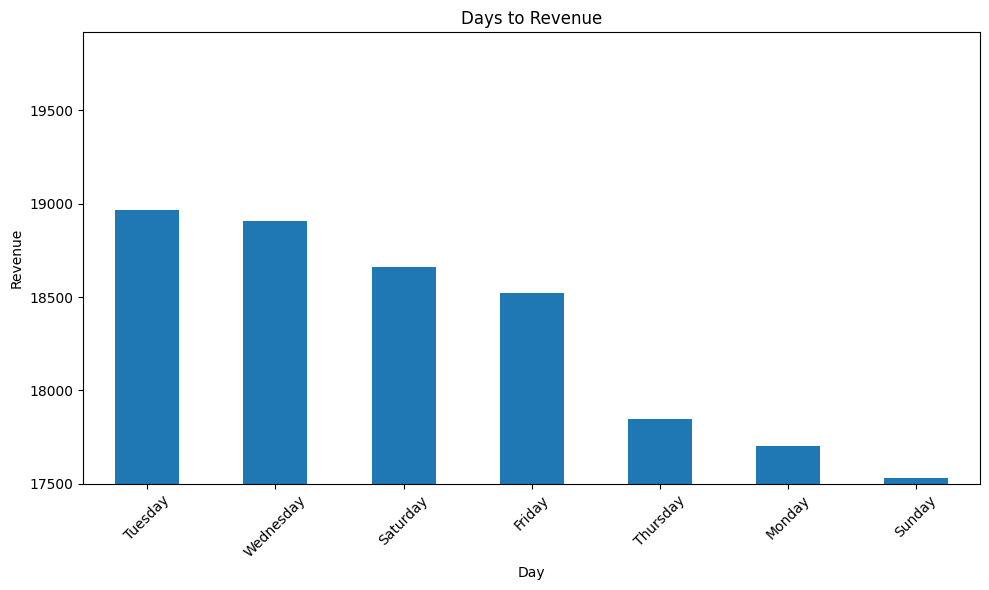

In [68]:
data['datesDT'] = pd.to_datetime(data["order_date"])
data["days"] = data['datesDT'].dt.day_name()

dates_category = data.groupby("days")['revenue'].sum()
dates_category = dates_category.sort_values(ascending=False)
print(dates_category.head())

makeHistogram(dates_category, "Days to Revenue", "Day", "Revenue", 7, 17500)

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

             sum  profit margins
region                          
North   14350.74        2870.148
South   14011.60        2802.320
East    12429.21        2485.842
West    10968.12        2193.624


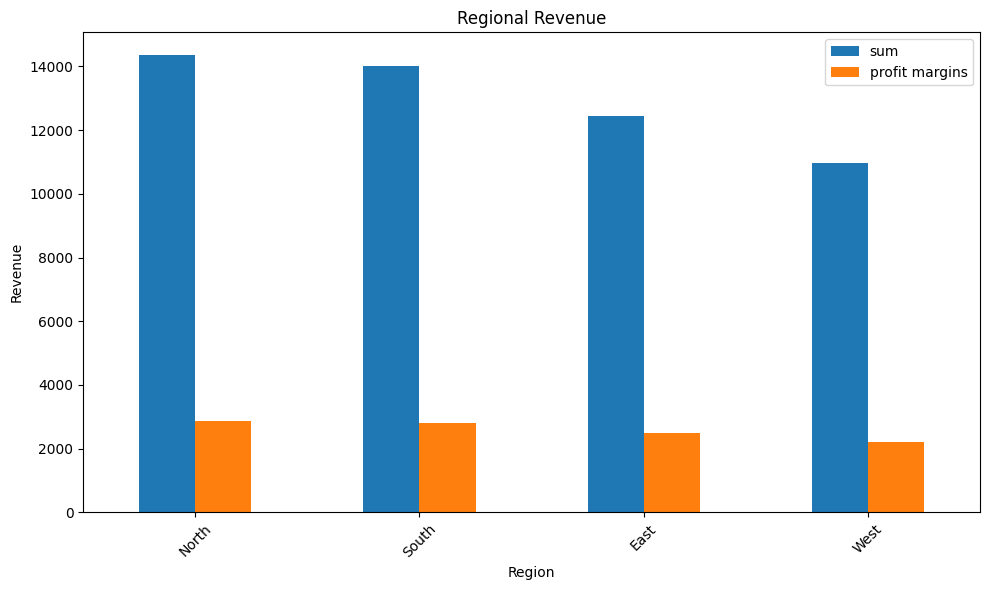

In [74]:
region_totals = data.groupby("region")["unit_price"].agg(['sum'])
region_totals = region_totals.sort_values(by = "sum", ascending=False)
region_totals["profit margins"] = 0.2 * region_totals['sum']
print(region_totals.head())

makeHistogram(region_totals, "Regional Revenue", "Region")


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

This business should focus on the PArofessional Customer Segment, as it is the most profitable by 
Thus, it would be best to create targeted marketing campaigns on professional websites such as Linkedin. 

Credit Cards and PayPal make up a significant proportion (50%) of the method of purchase for this product. Thus, the revenue category should consider the fees added by these payment methods. 

Discount purchases make up 52% of purchases. Additionally, the revenue of discount purchases exceeds the revenue of non-discount purchases by 
$20,000 

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.